# Imports



In [1]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn import datasets

#evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

# Data


## Titanic

In [3]:
DATASET_DIR = "../../data/"
TRAIN_DATA_FILE = "titanic-training-data.csv"

In [4]:
df_tit = pd.read_csv(DATASET_DIR + TRAIN_DATA_FILE, engine="python")

In [5]:
df_tit.info()
df_tit.columns#  # Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
#       dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Preprocessing

#### Fixing Null and NA

In [6]:
# Target variable 
# df_tit.Survived.value_counts() #0 or 1
df_tit.shape #891 rows
# df_tit.isnull().sum()

(891, 12)

In [7]:
df_tit.columns
df_tit = df_tit.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [8]:
df_tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

We see that AGE and EMBARKED need to be corrected. To correct Age we replace with the average of the group Parch.

In [9]:
df_tit["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
Parch_groups = df_tit.groupby(df_tit['Parch'])
# Parch_groups.get_group(1)
Parch_groups.mean()

C:\Users\RhysL\AppData\Local\Temp\ipykernel_10992\4203955628.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Parch_groups.mean()


,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [11]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
        
    else:
        return Age
df_tit['Age']= df_tit[['Age', 'Parch']].apply(age_approx, axis=1)


In [12]:
df_tit.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [13]:
df_tit.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [14]:
df_tit.dropna(inplace=True)
df_tit.reset_index(inplace=True, drop=True)
# print(df_tit.info())

### Converting categorical variables to a dummy indicators

#### SEX

Need to convert Sex to number for regression.

In [15]:
df_tit.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = df_tit['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)


In [17]:

# gender_encoded
# 1 = male / 0 = female
gender_DF = pd.DataFrame(gender_encoded, columns=['male_gender'])
gender_DF.head()

,male_gender
0,1
1,0
2,0
3,0
4,1


#### Embarked

In [18]:
df_tit.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [19]:
df_tit['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
884    S
885    S
886    S
887    C
888    Q
Name: Embarked, Length: 889, dtype: object

In [20]:
embarked_cat = df_tit['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)

In [21]:
embarked_encoded[0:10] #array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0])

In [22]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_DF = pd.DataFrame(embarked_1hot_mat, columns = ['C', 'Q', 'S'])
embarked_DF.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


#### Joining

#need to join gender_DF and embarked_DF with df_tit (remove categorical cols and replace).

In [23]:
df_tit.drop(['Sex', 'Embarked'], axis=1, inplace=True)
# df_tit.head()

In [24]:
df_tit = pd.concat([df_tit, gender_DF, embarked_DF], axis=1, verify_integrity=True).astype(float)
df_tit[0:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_gender,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0


In [25]:
#we also drop these becuase they are corrolated.
df_tit.drop(['Fare','Pclass'], axis=1, inplace=True)
df_tit.head()

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


# Titanic Model

## Model deploying

In [28]:
# df_tit.head()
X_train, X_test, y_train, y_test = train_test_split(df_tit.drop('Survived', axis=1),
                                                   df_tit['Survived'], test_size=0.2,
                                                   random_state=200)
# X_train.head()

In [29]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [33]:
y_pred = LogReg.predict(X_test)
y_pred

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0.])

## Model Evaluation
### Classification report without cross-validation

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### K-fold cross-validation & confusion matrices

In [40]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)


In [41]:

confusion_matrix(y_train, y_train_pred)

#array([[377,  63],
    #    [ 91, 180]], dtype=int64

array([[377,  63],
       [ 91, 180]], dtype=int64)

In [42]:
precision_score(y_train, y_train_pred)

0.7407407407407407

### Make a test prediction

In [46]:
# Take an example passanger, predict if theyd survive.
df_tit[863:864]
test_passenger = np.array([866, 42, 0, 0, 0, 0, 0, 1]).reshape(1,-1)

print(LogReg.predict(test_passenger)) #[1.]
#What was the probability of 0 or 1
print(LogReg.predict_proba(test_passenger)) #[[0.26657994 0.73342006]]

,PassengerId,Survived,Age,SibSp,Parch,male_gender,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


# Breast Cancer Model

In [10]:
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Logistic model

In [11]:

clf = LogisticRegression()
clf.fit(X_train,y_train)

c:\Users\RhysL\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

0.9473684210526315


In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9473684210526315
Precision: 0.92
Recall: 1.0
F1 Score: 0.9583333333333334
Confusion Matrix:
[[39  6]
 [ 0 69]]


In [ ]:
print(classification_report(y_test, y_pred))

#### Features of importance

Feature importance provides insights into which features are more influential in the model's predictions.

- Helps identify key factors that contribute to predictions.
- We can focus of key features to reduce complexity.
- When plotting the bar graph with negative coefficients, you are visualizing both the magnitude and the direction (sign) of the impact that each feature has on the predictions. 

In [28]:
feature_names = bc.feature_names
#coefficents are the weights of the model mathwise
#The coefficients indicate the direction and strength of the impact that each feature
# has on the log-odds of the target being in the positive class.
coefficients = clf.coef_[0]
coefficients

array([ 1.70965425e+00,  9.08565683e-02, -1.55218830e-02, -1.49588208e-03,
       -7.17143931e-02, -3.20708975e-01, -4.38752382e-01, -1.80786233e-01,
       -8.57012383e-02, -1.78904501e-02,  9.00101055e-02,  8.79658760e-01,
        3.69346278e-01, -1.12394572e-01, -7.89828010e-03, -6.98000210e-02,
       -9.26065459e-02, -2.39795985e-02, -1.41954533e-02, -7.23649446e-03,
        1.81934024e+00, -3.10110462e-01, -1.96892272e-01, -2.61017581e-02,
       -1.34834727e-01, -1.01280662e+00, -1.22333253e+00, -3.52291524e-01,
       -2.64452645e-01, -1.00536204e-01])

In [30]:
# feature_importance = dict(zip(feature_names, coefficients))
# # print("Feature Importance:")
# # print(feature_importance)

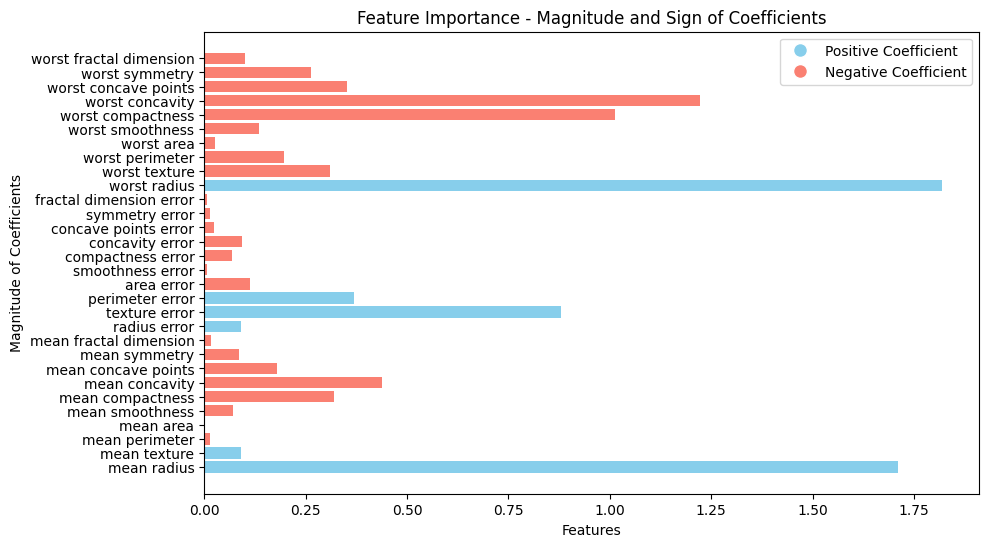

In [31]:
# Get the magnitudes of coefficients
magnitudes = np.abs(coefficients)

# Print feature names and their magnitudes
feature_magnitudes = dict(zip(feature_names, magnitudes))
# print("Feature Magnitudes:")
# print(feature_magnitudes)

# Assuming you have already calculated the coefficients and feature names
coefficients = clf.coef_[0]
feature_names = bc.feature_names

# Get the signs of coefficients
signs = np.sign(coefficients)

# Get the magnitudes of coefficients
magnitudes = np.abs(coefficients)

# Plot bar graph with colors indicating signs
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, magnitudes, color=np.where(signs > 0, 'skyblue', 'salmon'))

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Magnitude of Coefficients')
plt.title('Feature Importance - Magnitude and Sign of Coefficients')

# Add legend for sign indication
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive Coefficient'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative Coefficient')],
           loc='upper right')

# Show the plot
plt.show()


#### ROC 

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

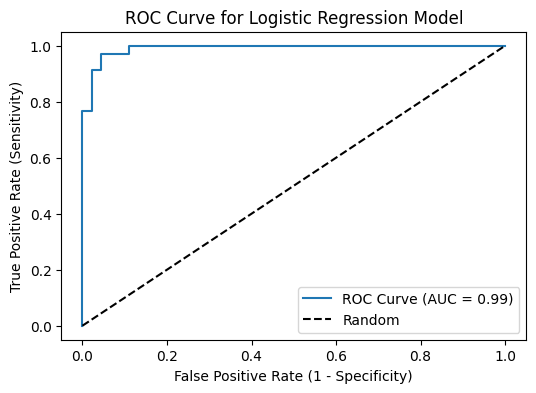

In [16]:

# Assuming you have already trained your logistic regression model (clf) and made predictions (y_pred)

# Get predicted probabilities for the positive class (class 1)
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend()
plt.show()


#### Modeling a specific part

In [32]:
bc.feature_names #30

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
X_train[1] #30

array([2.109e+01, 2.657e+01, 1.427e+02, 1.311e+03, 1.141e-01, 2.832e-01,
       2.487e-01, 1.496e-01, 2.395e-01, 7.398e-02, 6.298e-01, 7.629e-01,
       4.414e+00, 8.146e+01, 4.253e-03, 4.759e-02, 3.872e-02, 1.567e-02,
       1.798e-02, 5.295e-03, 2.668e+01, 3.348e+01, 1.765e+02, 2.089e+03,
       1.491e-01, 7.584e-01, 6.780e-01, 2.903e-01, 4.098e-01, 1.284e-01])

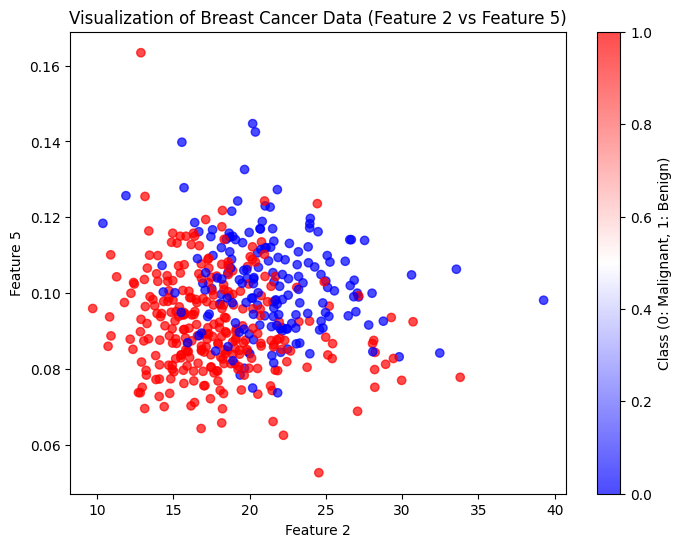

In [47]:
# Choose features for visualization (feature 2 and feature 5 in this case)
feature2_index = 1  # Index of the second feature
feature5_index = 4  # Index of the fifth feature

# Split the data for visualization purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, feature2_index], X_train[:, feature5_index], c=y_train, cmap='bwr', alpha=0.7)

# Label the plot
plt.title(f'Visualization of Breast Cancer Data (Feature {feature2_index + 1} vs Feature {feature5_index + 1})')
plt.xlabel(f'Feature {feature2_index + 1}')
plt.ylabel(f'Feature {feature5_index + 1}')
plt.colorbar(label='Class (0: Malignant, 1: Benign)')
plt.show()


In [48]:
# Create subsets with only the selected features
X_train_subset = X_train[:, [feature2_index, feature5_index]]
X_test_subset = X_test[:, [feature2_index, feature5_index]]

# Create a logistic regression model
logreg_model = LogisticRegression(random_state=1234)

# Train the model on the subset of data
logreg_model.fit(X_train_subset, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_subset)

In [1]:


# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# # Calculate F1-score
# f1 = f1_score(y_test, y_pred)
# print("F1 Score:", f1)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

NameError: name 'accuracy_score' is not defined


# Raw implementation of logistic regression



In [ ]:
class LogisticRegression:
    """Logistic Regression model.
    
    Arguments:
    ---------
    iterations: int
        Number of Gradient Descent Steps that will be performed in order to change weights of
        linear model
    learning_rate: float
        Weight applied for Gradient Descent Step during updating weights. (default: 0.001)
    verbose: boolean
        Flag for debugging. If set to true then error values achieved by model during training
        cycle will be displayed.
    """
    def __init__(self, iterations, learning_rate=0.001, verbose=False):
        self.w = None
      
        self.error_history = list()
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.verbose = verbose
    
    def fit(self, X, y):
        """Function that is adjusting Logistic Regression Model weights 'w' to inserted data 'X'
        according to target values 'y'."""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        y = y.astype(np.float32)

        # Insert 1 values in first row of data for bias
        X = np.insert(X, 0, 1, axis=1)
        
        # Number of samples
        num_samples, num_features = X.shape
        
        # Xavier initialization for weights
        xavier_range = 1 / np.sqrt(num_features)
        self.w = np.random.uniform(-xavier_range, xavier_range, (num_features,))
        
        # Perform training
        for i in range(0, self.iterations):
            
            # Using weights for prediction
            pred = self._sigmoid(np.dot(X, self.w))
            
            # Gradient step - Calculating gradient
            gradient = (1 / num_samples) * (np.dot(X.T, (pred - y)))
                                       
            # Gradient step - Updating weights
            self.w = self.w - self.learning_rate * gradient
                                       
            # Calculating Cross-Entropy Error for new weights
            error = self._cross_entropy(X, y, num_samples)
            self.error_history.append(error)
                                       
            # Displaying learning progress every 100 iterations
            if self.verbose and i % 100 == 0:
                print("Iteration no. " + str(i) + ", error: " + str(error))
                
    def _sigmoid(self, X):
        """Application of Sigmoid function which squashes input values in range 0-1 which
        which corresponds to probability value ragne."""
        
        return 1 / (1 + np.exp(-X))
            
    def _cross_entropy(self, X, y, num_samples):
        """Implementation of Cross-Entropy - cost function for monitoring how classification
        is performed with current 'w' values"""
        
        pred = self._sigmoid(np.dot(X, self.w))
        return (-1 / num_samples) * np.sum(y * np.log10(pred) + (1 - y) * np.log10(1 - pred))
    
    def predict(self, X):
        """Function that takes feature values 'X' and returns predictions with usage of 
        current 'w' values"""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        
        # Insert 1 values in first row of data for bias
        X = np.insert(X, 0, 1, axis=1)
        pred = self._sigmoid(np.dot(X, self.w))
        return pred